In [1]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('transfer_data.csv')
data.head()

,x,y
0,-5.0,25.00
1,-4.9,24.01
2,-4.8,23.04
3,-4.7,22.09
4,-4.6,21.16


In [2]:
#define x and y
X = data.loc[:,'x']
y = data.loc[:,'y']
y.head()

0    25.00
1    24.01
2    23.04
3    22.09
4    21.16
Name: y, dtype: float64

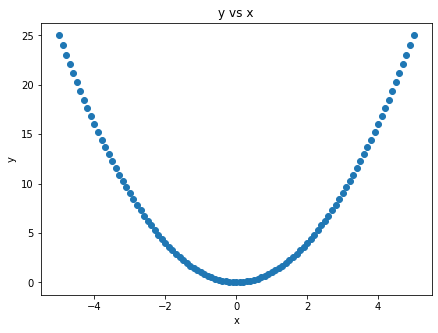

In [3]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(7,5))
plt.scatter(X,y)
plt.title('y vs x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
X = np.array(X).reshape(-1,1)
print(X.shape,y.shape)

(101, 1) (101,)


In [10]:
from keras.models import Sequential
from keras.layers import Dense
model1 = Sequential()
model1.add(Dense(units=50, input_dim = 1, activation='relu'))
model1.add(Dense(units=50,activation='relu'))
model1.add(Dense(units=1, activation = 'linear'))
model1.compile(optimizer='adam',loss='mean_squared_error')
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [18]:
#train the model
model1.fit(X,y,epochs=200)

Epoch 1/200
101/101 [==============================] - 0s 129us/step - loss: 1.0078
Epoch 2/200
101/101 [==============================] - 0s 109us/step - loss: 0.9917
Epoch 3/200
101/101 [==============================] - 0s 109us/step - loss: 0.9843
Epoch 4/200
101/101 [==============================] - 0s 119us/step - loss: 0.9604
Epoch 5/200
101/101 [==============================] - 0s 148us/step - loss: 0.9504
Epoch 6/200
101/101 [==============================] - 0s 129us/step - loss: 0.9247
Epoch 7/200
101/101 [==============================] - 0s 139us/step - loss: 0.9163
Epoch 8/200
101/101 [==============================] - 0s 168us/step - loss: 0.9000
Epoch 9/200
101/101 [==============================] - 0s 109us/step - loss: 0.8704
Epoch 10/200
101/101 [==============================] - 0s 139us/step - loss: 0.8563
Epoch 11/200
101/101 [==============================] - 0s 119us/step - loss: 0.8454
Epoch 12/200
101/101 [==============================] - 0s 168us/step - lo

Epoch 97/200
101/101 [==============================] - 0s 168us/step - loss: 0.2246
Epoch 98/200
101/101 [==============================] - 0s 148us/step - loss: 0.2227
Epoch 99/200
101/101 [==============================] - 0s 198us/step - loss: 0.2226
Epoch 100/200
101/101 [==============================] - 0s 129us/step - loss: 0.2154
Epoch 101/200
101/101 [==============================] - 0s 178us/step - loss: 0.2133
Epoch 102/200
101/101 [==============================] - 0s 158us/step - loss: 0.2107
Epoch 103/200
101/101 [==============================] - 0s 139us/step - loss: 0.2080
Epoch 104/200
101/101 [==============================] - 0s 139us/step - loss: 0.2110
Epoch 105/200
101/101 [==============================] - 0s 188us/step - loss: 0.2130
Epoch 106/200
101/101 [==============================] - 0s 168us/step - loss: 0.2069
Epoch 107/200
101/101 [==============================] - 0s 158us/step - loss: 0.2014
Epoch 108/200
101/101 [==============================] - 

In [19]:
#make prediction
y_predict = model1.predict(X)

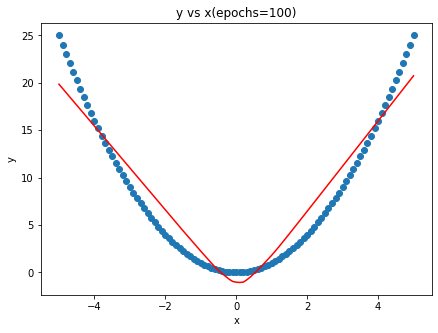

In [13]:
fig2 = plt.figure(figsize=(7,5))
plt.scatter(X,y)
plt.plot(X,y_predict,'r')
plt.title('y vs x(epochs=100)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

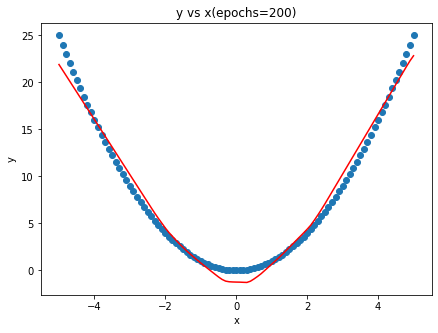

In [17]:
fig3 = plt.figure(figsize=(7,5))
plt.scatter(X,y)
plt.plot(X,y_predict,'r')
plt.title('y vs x(epochs=200)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

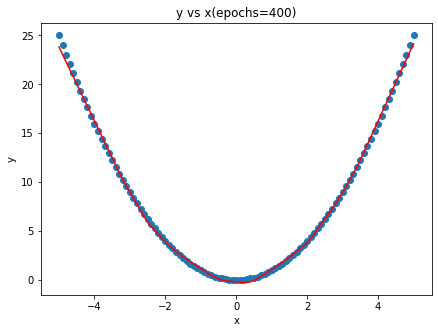

In [20]:
fig4 = plt.figure(figsize=(7,5))
plt.scatter(X,y)
plt.plot(X,y_predict,'r')
plt.title('y vs x(epochs=400)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [26]:
from sklearn.externals import joblib
joblib.dump(model1,'model1.m')

C:\Users\niubi\Anaconda3\envs\env_ttest\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [35]:
model2 = joblib.load('model1.m')

In [28]:
data2 = pd.read_csv('transfer_data2.csv')
data2.head()

,x2,y2
0,-5.0,26.00
1,-4.9,25.21
2,-4.8,24.44
3,-4.7,23.69
4,-4.6,22.96


In [29]:
#define x2 and y2
X2 = data2.loc[:,'x2']
y2 = data2.loc[:,'y2']

In [30]:
X2 = np.array(X2).reshape(-1,1)
print(X2.shape)

(101, 1)


In [31]:
y2_predict = model2.predict(X2)

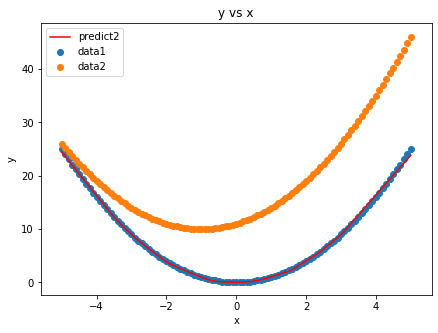

In [32]:
fig5 = plt.figure(figsize=(7,5))
plt.scatter(X,y,label = 'data1')
plt.scatter(X2,y2 , label = 'data2')
plt.plot(X,y2_predict,'r',label='predict2')
plt.title('y vs x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [42]:
#transfer learning
model2.fit(X2,y2,epochs=20)

Epoch 1/20
101/101 [==============================] - 0s 99us/step - loss: 2.4736
Epoch 2/20
101/101 [==============================] - 0s 89us/step - loss: 2.1672
Epoch 3/20
101/101 [==============================] - 0s 79us/step - loss: 1.8986
Epoch 4/20
101/101 [==============================] - 0s 79us/step - loss: 1.6712
Epoch 5/20
101/101 [==============================] - 0s 99us/step - loss: 1.4537
Epoch 6/20
101/101 [==============================] - 0s 69us/step - loss: 1.2996
Epoch 7/20
101/101 [==============================] - 0s 89us/step - loss: 1.1602
Epoch 8/20
101/101 [==============================] - 0s 99us/step - loss: 1.0358
Epoch 9/20
101/101 [==============================] - 0s 99us/step - loss: 0.9541
Epoch 10/20
101/101 [==============================] - 0s 69us/step - loss: 0.8581
Epoch 11/20
101/101 [==============================] - 0s 119us/step - loss: 0.7655
Epoch 12/20
101/101 [==============================] - 0s 89us/step - loss: 0.6968
Epoch 13/20


In [43]:
y2_predict = model2.predict(X2)

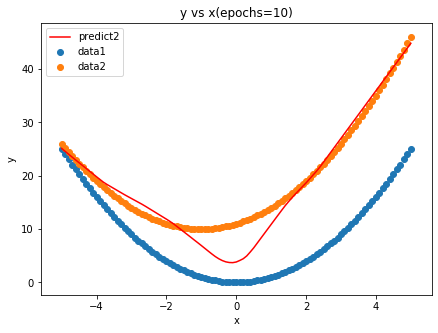

In [38]:
fig6 = plt.figure(figsize=(7,5))
plt.scatter(X,y,label = 'data1')
plt.scatter(X2,y2 , label = 'data2')
plt.plot(X,y2_predict,'r',label='predict2')
plt.title('y vs x(epochs=10)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

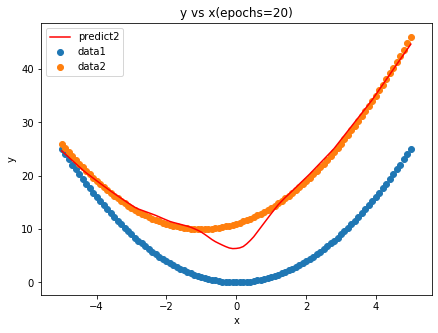

In [41]:
fig7 = plt.figure(figsize=(7,5))
plt.scatter(X,y,label = 'data1')
plt.scatter(X2,y2 , label = 'data2')
plt.plot(X,y2_predict,'r',label='predict2')
plt.title('y vs x(epochs=20)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

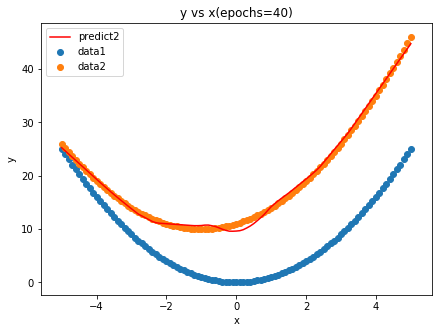

In [44]:
fig8 = plt.figure(figsize=(7,5))
plt.scatter(X,y,label = 'data1')
plt.scatter(X2,y2 , label = 'data2')
plt.plot(X,y2_predict,'r',label='predict2')
plt.title('y vs x(epochs=40)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()